<a href="https://colab.research.google.com/github/rashidmeras/EVA-M6/blob/master/EVA_S4_Assignment1_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVA (M6) Session4 Assignment: Proposal1

Objective:

1. Create a Vanilla network for MNIST data set
2. Define the network architecture such that:
> * It has 3x3 convolution
> * It has 1x1 convolution
> * It has a transitional layer (i.e. MaxPooling)
> * Use ReLU for activation function
> * Use SoftMax at the final layer


The main objective at this level is to define the architecture of the network and then work towards tuning the network using different techniques, therefore in "Proposal1" we are not concerned about the number of parameters or the validation accuracy of the network. 

*So lets Start!!*



Install the keras API library

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


From Keras API library following APIs are needed to create a DNN:

* The sequential API allows to create models layer-by-layer
* The Flatten API flattens the input. Does not affect the batch size.
* The Convolution2D API creates a convolution kernel that is convolved with the layer input.
* The np_utils API is used to convert a class vector (integers) to binary class matrix.
* Finally import the MNSIT dataset from Keras

MNIST has a training set of 60,000 examples, and a test set of 10,000 examples.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist


Load the the data, shuffled and split between train and test sets.

>The MNIST dataset consists of pair, “handwritten digit image” and “label”. Digit ranges from 0 to 9, meaning 10 patterns in total.

* handwritten digit image (X_train): This is gray scale image with size 28 x 28 pixel.
* label (y_train): This is actual digit number this handwritten digit image represents. It is the numbers between including 0 to 9.

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Matplotlib is a Python 2D plotting library & PyPlot is a shell-like interface to Matplotlib

Display the data in X_train[0] array

(60000, 28, 28)


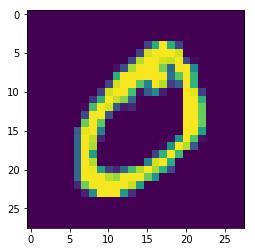

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

Flatten 28x28 images to a 28*28=784 vector for each image.

> The images in the dataset are of 28*28 dimensions which is difficult to accommodate in a simple multilayer neural network. Therefore we need to convert the images into a single dimension where each image contains 784-pixel data using the reshape() function.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The pixel values in the images are in the range of 0 - 255 and in this step we reduce this range even further and normalize it between 0 and 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

label : This is actual digit number this handwritten digit image represents. It is the numbers between including 0 to 9.

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert class vectors to binary class matrices:

> As we can see from above, the output of y_train is an integer from 0 to 9. We need to perform one-hot encoding of the class labels for getting a vector of class integers into a binary matrix. We need to do this to do a “binarization” of the category and so that we can include it as a feature to train the neural network.

We can use the built in np_utils.to_categorical() helper function in keras to do this.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Print the Y_train array after binarization

In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)


The Proposed Network Architecture:
---


![Proposed Network Archtecture](https://rashidmeras.github.io/images/eva/S4_Proposal1_Fig1.png)


The above figure shows the propsed network architecture. As shown in the figure there are a total of 11 layers in the network. Starting from 32 channels at Layer1 the cahnnel size is doubled at each layer and at Layer9 the channles size increses maximum upto 1024 channels.







> Let's fix a random seed=**990** for reproducibility!

In [0]:
# fix random seed for reproducibility
seed = 990
np.random.seed(seed)

**Network Type 1:**

Using the architecture that we have defined above, we implement the netowrk as shown below.

In [12]:
from keras.layers import Activation
model = Sequential()
 
#Layer1: i/p:|28x28x1|Conv(3x3x1)x32| o/p:|26x26x32|
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

#Layer2: i/p:|26x26x32|Conv(3x3x32)x64| o/p:|24x24x64|
model.add(Convolution2D(64, 3, 3, activation='relu'))

#Layer3: i/p:|24x24x64|Conv(3x3x64)x128| o/p:|22x22x128|
model.add(Convolution2D(128, 3, 3, activation='relu'))

#Layer4: i/p:|22x22x128|Conv(1x1x128)x32| o/p:|22x22x32|
model.add(Convolution2D(32, 1, 1, activation='relu'))

#Layer5: Max-Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2))) #11

#Layer6: i/p:|11x11x32|Conv(3x3x32)x64| o/p:|9x9x64|
model.add(Convolution2D(64, 3, 3, activation='relu'))

#Layer7: i/p:|9x9x64|Conv(3x3x64)x128| o/p:|7x7x128|
model.add(Convolution2D(128, 3, 3, activation='relu'))

#Layer8: i/p:|7x7x128|Conv(3x3x128)x256| o/p:|5x5x256|
model.add(Convolution2D(256, 3, 3, activation='relu'))

#Layer9: i/p:|5x5x256|Conv(3x3x256)x1024| o/p:|3x3x1024|
model.add(Convolution2D(1024, 3, 3, activation='relu'))

#Layer10: i/p:|3x3x1024|Conv(3x3x1024)x10| o/p:|1x1x10|
model.add(Convolution2D(10, 3, 3))

#Layer11: Flatten & activation
model.add(Flatten())
model.add(Activation('softmax'))

#Print model summary
model.summary()


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`


Compile the model based on following:

* Optimization method: Here we use 'adam'
* Kind of loss this method will optimize: Here we use 'categorical_crossentropy'

Start training the model:

* Batch size: set to 128
* Epoch: set to 10

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0515 - acc: 0.9847
Epoch 2/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.0337 - acc: 0.9897
Epoch 3/10
60000/60000 [==============================] - 13s 208us/step - loss: 0.0244 - acc: 0.9925
Epoch 4/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0192 - acc: 0.9941
Epoch 5/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.0171 - acc: 0.9950
Epoch 6/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0153 - acc: 0.9949
Epoch 7/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0118 - acc: 0.9962
Epoch 8/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0113 - acc: 0.9967
Epoch 9/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0122 - acc: 0.9963
Epoch 10/10
60000/60000 [==============================] - 13s 214us/step - loss: 

Evaluate the Network Type1 performance and print the score:

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03234915348608747, 0.9919]


Result:


* Total params: 2,936,810
* Trainable params: 2,936,810
* Non-trainable params: 0

 > * Score (validation accuracy): **99.19%**

Analysis:
The total number of parameters are quite huge in this network and the accuracy is also not upto the mark. As we know that keras by default has the bias parameter turned on, we can swicth off the bias and see  how the network behaves. 

This is done in the Network Type2 as shown below.




---





**Network Type2: (use_bias=False)**

In [17]:
from keras.layers import Activation
model = Sequential()
 
#Layer1: i/p:|28x28x1|Conv(3x3x1)x32| o/p:|26x26x32|
model.add(Convolution2D(32, 3, 3, activation='relu', use_bias=False, input_shape=(28,28,1)))

#Layer2: i/p:|26x26x32|Conv(3x3x32)x64| o/p:|24x24x64|
model.add(Convolution2D(64, 3, 3, activation='relu', use_bias=False))

#Layer3: i/p:|24x24x64|Conv(3x3x64)x128| o/p:|22x22x128|
model.add(Convolution2D(128, 3, 3, activation='relu', use_bias=False))

#Layer4: i/p:|22x22x128|Conv(1x1x128)x32| o/p:|22x22x32|
model.add(Convolution2D(32, 1, 1, activation='relu', use_bias=False))

#Layer5: Max-Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2))) #11

#Layer6: i/p:|11x11x32|Conv(3x3x32)x64| o/p:|9x9x64|
model.add(Convolution2D(64, 3, 3, activation='relu', use_bias=False))

#Layer7: i/p:|9x9x64|Conv(3x3x64)x128| o/p:|7x7x128|
model.add(Convolution2D(128, 3, 3, activation='relu', use_bias=False))

#Layer8: i/p:|7x7x128|Conv(3x3x128)x256| o/p:|5x5x256|
model.add(Convolution2D(256, 3, 3, activation='relu', use_bias=False))

#Layer9: i/p:|5x5x256|Conv(3x3x256)x1024| o/p:|3x3x1024|
model.add(Convolution2D(1024, 3, 3, activation='relu', use_bias=False))

#Layer10: i/p:|3x3x1024|Conv(3x3x1024)x10| o/p:|1x1x10|
model.add(Convolution2D(10, 3, 3, use_bias=False))

#Layer11: Flatten & activation
model.add(Flatten())
model.add(Activation('softmax'))

#Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        288       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18432     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 128)       73728     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)        4096      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 64)          18432     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 128)         73728     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", use_bias=False)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", use_bias=False)`
/usr

Compile the model based on following:

* Optimization method: Here we use 'adam'
* Kind of loss this method will optimize: Here we use 'categorical_crossentropy'


Start training the model:

* Batch size: set to 128
* Epoch: set to 10

Evaluate the model performance and print the score

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.1708 - acc: 0.9470
Epoch 2/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.0456 - acc: 0.9865
Epoch 3/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0348 - acc: 0.9894
Epoch 4/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0254 - acc: 0.9922
Epoch 5/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0225 - acc: 0.9934
Epoch 6/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0183 - acc: 0.9943
Epoch 7/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0172 - acc: 0.9949
Epoch 8/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0136 - acc: 0.9959
Epoch 9/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0123 - acc: 0.9962
Epoch 10/10
60000/60000 [==============================] - 12s 202us/step - loss: 

Result:

* Total params: 2,935,072
* Trainable params: 2,935,072
* Non-trainable params: 0
>* Score (validation accuracy): **99.31%** 

Analysis:
* Net reduction in parameters betwen Type1 and Type2 Network:   2,936,810 - 2,935,072 = 1738


###Summary:

1.  Score comparison between Type1 and Type2 network:
> * Type1 network score: **99.12%**  
> * Type2 network score: **99.31%**

2.  Comparing Type1 and Type2 networks we can see that without using bias in Type2 there is slight decrease in  total number of parameters and also an improvment in the overall vaildation accuracy.

3.  Hence we can use the architecture defined in this *Proposal1*  with the tecniques used in *Type2 Network* further to see how we can achieve the final target of designing a network with less than 15,000 parameters with a minimum validation accuracy of 99.4%

###Thank you!